In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
data=pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.shape

(48842, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Seprating into numerical and categorical columns

In [8]:
df1=data.select_dtypes(include=['float64', 'int64'])
df2=data.select_dtypes(include=['object'])

## Exploratory Data Analysis

In [9]:
for i in df1:
    d=data[i].skew()
    print("Skew of ",i+" is ",d)

Skew of  age is  0.5575803166133181
Skew of  fnlwgt is  1.4388918785218416
Skew of  educational-num is  -0.3165248566607419
Skew of  capital-gain is  11.894658996587946
Skew of  capital-loss is  4.569808857738484
Skew of  hours-per-week is  0.23874965720275756


In [10]:
for i in df1:
    d=data[i].kurtosis()
    print("Kurtosis of ",i+" is ",d) 

Kurtosis of  age is  -0.18426874062387766
Kurtosis of  fnlwgt is  6.05784821246471
Kurtosis of  educational-num is  0.6257452727879236
Kurtosis of  capital-gain is  152.69309629828723
Kurtosis of  capital-loss is  20.01434595465143
Kurtosis of  hours-per-week is  2.9510590898442954


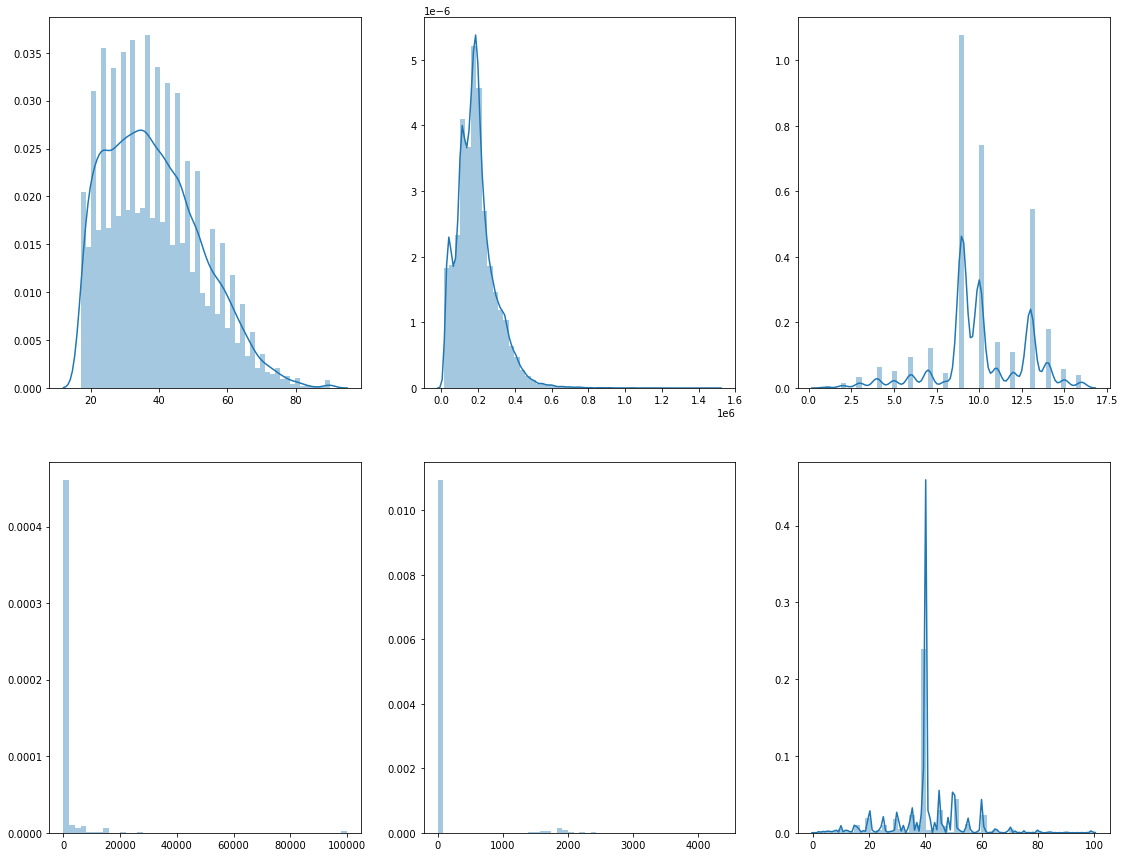

In [11]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(19, 15))

sns.distplot(data[['age']],            ax=axes[0][0]);
sns.distplot(data[['fnlwgt']] ,        ax=axes[0][1]);
sns.distplot(data[['educational-num']],ax=axes[0][2]);
sns.distplot(data[['capital-gain']],   ax=axes[1][0]);
sns.distplot(data[['capital-loss']],   ax=axes[1][1]);
sns.distplot(data[['hours-per-week']], ax=axes[1][2]);



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96C09F2B0>,
      dtype=object)

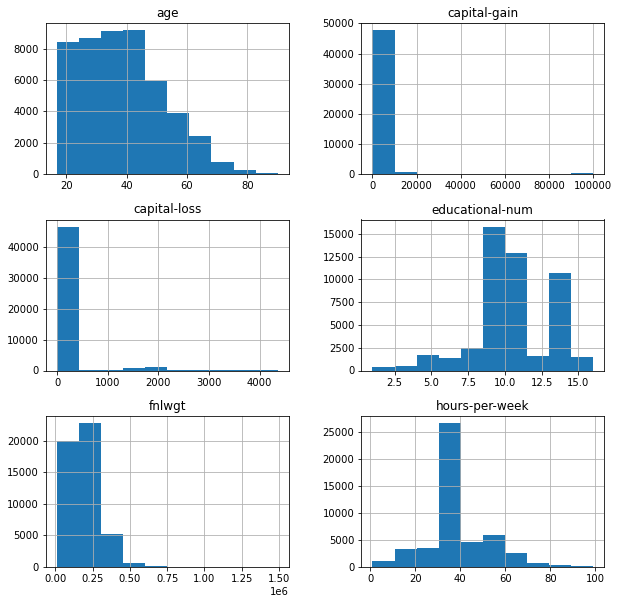

In [12]:
df1.hist(figsize=(10,10))


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

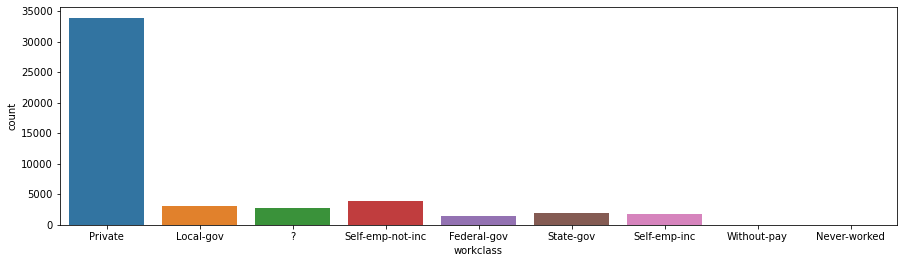

In [13]:
plt.figure(figsize=[15,4])
sns.countplot(x = 'workclass',data=data)
data.workclass.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

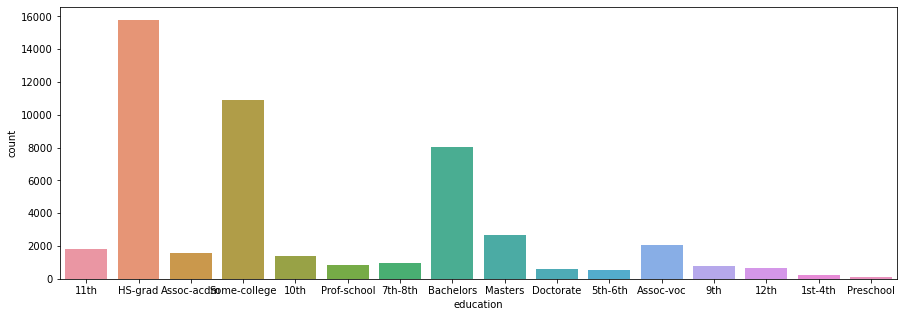

In [14]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'education',data=data)
data.education.value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

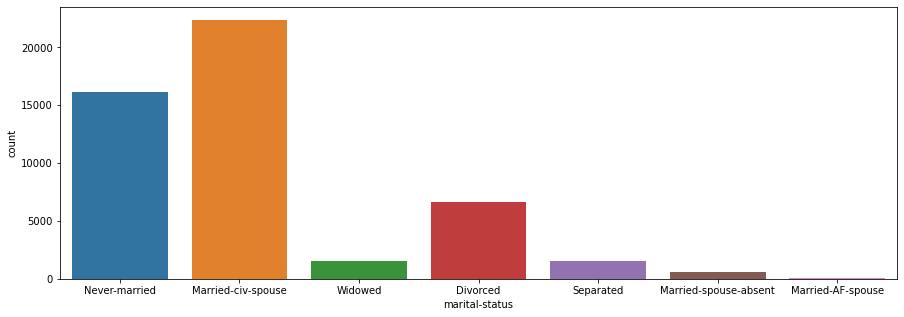

In [15]:
plt.figure(figsize=[15,5])
sns.countplot(x='marital-status',data=data)

data['marital-status'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

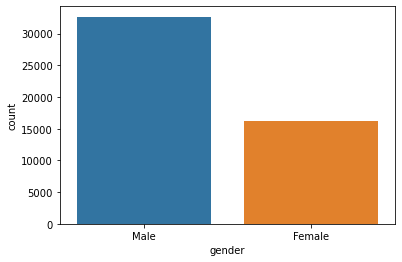

In [16]:
sns.countplot(x='gender',data=data)
data.gender.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

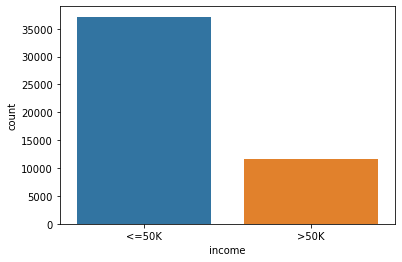

In [17]:
sns.countplot(x='income',data=data)
data.income.value_counts()

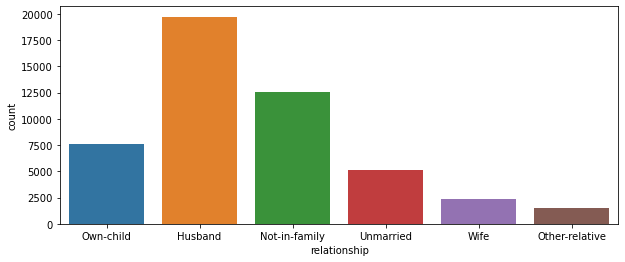

In [18]:
plt.figure(figsize=[10,4])
sns.countplot(data['relationship'])

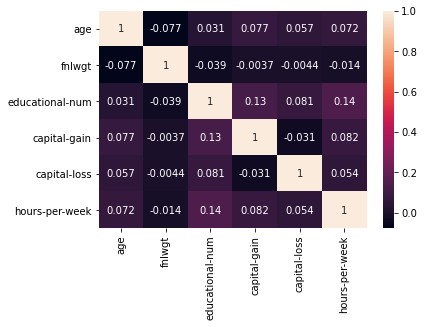

In [19]:
sns.heatmap(data.corr(),annot=True)

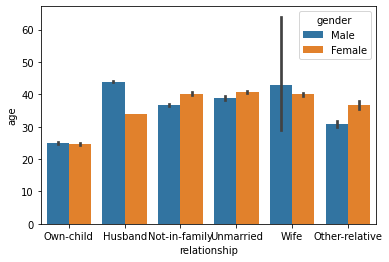

In [20]:
sns.barplot(y = data.age, hue= data.gender,x=data.relationship)

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

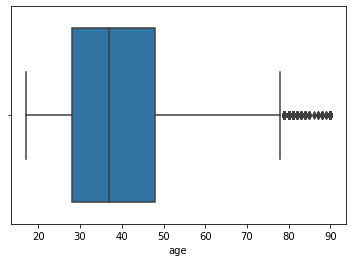

In [21]:
sns.boxplot(data['age'])
data.age.value_counts()

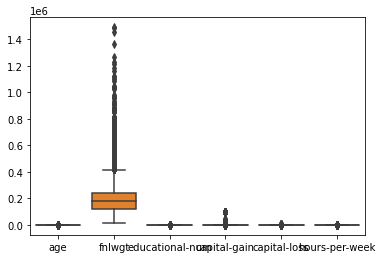

In [22]:
sns.boxplot(data=data)

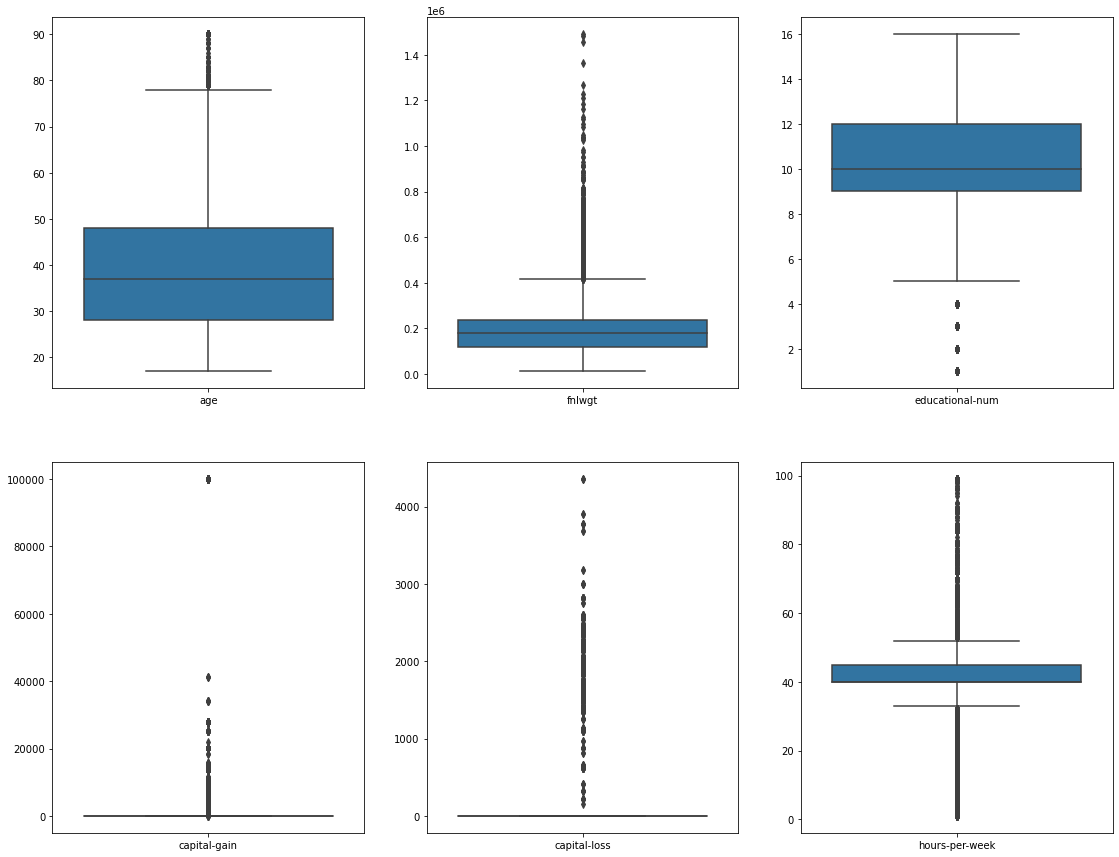

In [35]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(19, 15))

sns.boxplot(data=data[['age']],            ax=axes[0][0]);
sns.boxplot(data=data[['fnlwgt']] ,        ax=axes[0][1]);
sns.boxplot(data=data[['educational-num']],ax=axes[0][2]);
sns.boxplot(data=data[['capital-gain']],   ax=axes[1][0]);
sns.boxplot(data=data[['capital-loss']],   ax=axes[1][1]);
sns.boxplot(data=data[['hours-per-week']], ax=axes[1][2]);



## We can see that there are outliers in the data

### Inorder to remove outliers we have 2 methods
* Z-score
* IQR Score

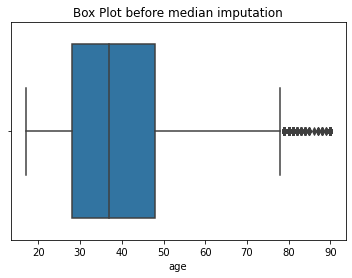

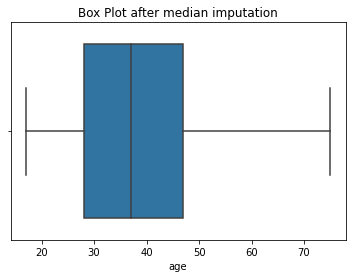

In [36]:
# median imputation for age column
sns.boxplot(data['age'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.73)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['age'])
for i in data['age']:
    if i > Upper_tail or i < Lower_tail:
            data['age'] = data['age'].replace(i, med)
sns.boxplot(data['age'])
plt.title("Box Plot after median imputation")
plt.show()

In [37]:
# removing outliers for fnlwgt
Q1=data['fnlwgt'].quantile(0.25)
Q3=data['fnlwgt'].quantile(0.72)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

117550.5
226837.87999999977
109287.37999999977
-46380.56999999966 390768.94999999943


In [38]:
data = data[(data.fnlwgt>Lower_Whisker) & (data.fnlwgt<Upper_Whisker)]

In [39]:
data.shape

(46714, 15)

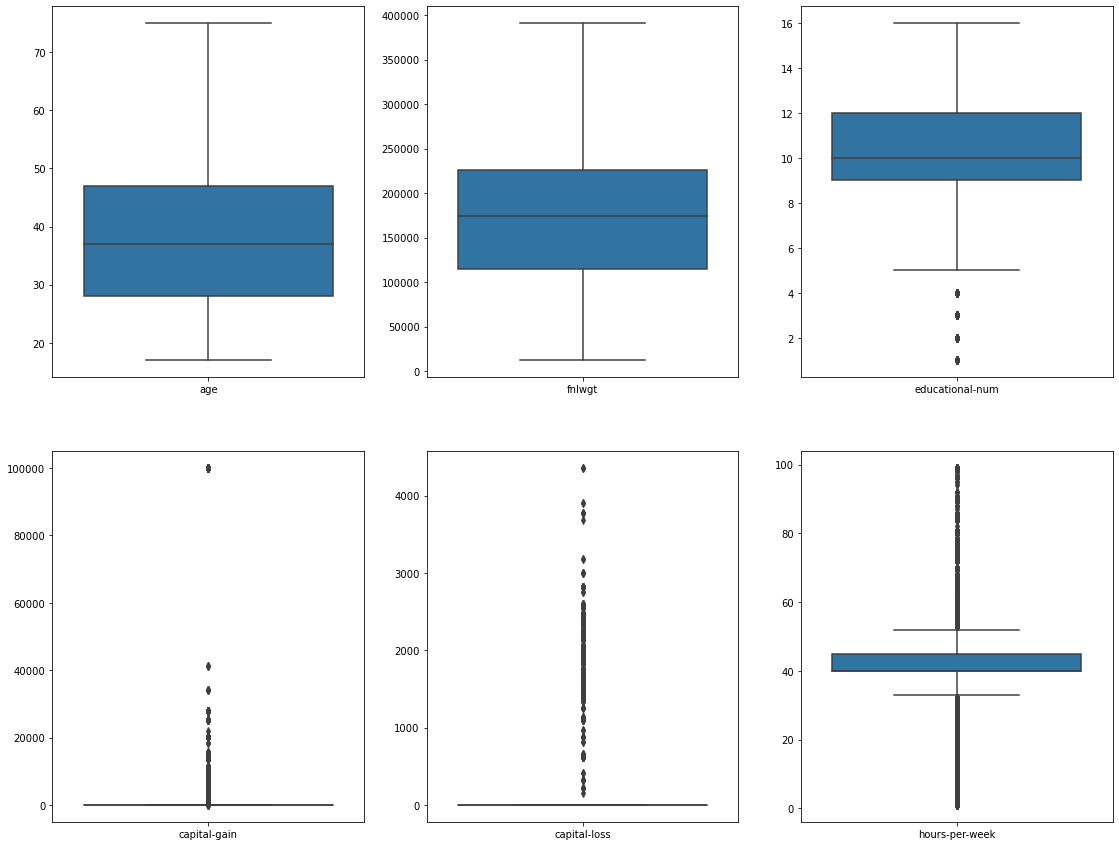

In [47]:
fig, (axes) = plt.subplots(nrows=2, ncols=3, figsize=(19, 15))

sns.boxplot(data=data[['age']],            ax=axes[0][0]);
sns.boxplot(data=data[['fnlwgt']] ,        ax=axes[0][1]);
sns.boxplot(data=data[['educational-num']],ax=axes[0][2]);
sns.boxplot(data=data[['capital-gain']],   ax=axes[1][0]);
sns.boxplot(data=data[['capital-loss']],   ax=axes[1][1]);
sns.boxplot(data=data[['hours-per-week']], ax=axes[1][2]);


In [48]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##  LABEL ENCODING 

In [50]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [51]:
data.workclass=enc.fit_transform(data.workclass)
data.education=enc.fit_transform(data.education)
data['marital-status']=enc.fit_transform(data['marital-status'])
data.occupation=enc.fit_transform(data.occupation)
data.relationship=enc.fit_transform(data.relationship)
data.race=enc.fit_transform(data.race)
data.gender=enc.fit_transform(data.gender)
data['native-country']=enc.fit_transform(data['native-country'])
data.income=enc.fit_transform(data.income)

In [52]:
  # independent variables
X = data.loc[:, data.columns != 'income']
y = data.loc[:, data.columns == 'income']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

In [54]:
X_train.shape,X_test.shape

((32699, 14), (14015, 14))

###   Training Logistic Regression model to prediction
        

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [57]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [58]:
y_pred_class.shape,y_test.shape

((14015,), (14015, 1))

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
log_reg_acc = accuracy_score(y_test,y_pred_class)*100

In [61]:
log_reg_acc

78.86550124866216

## Building a Decision Tree Model

In [62]:
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn import tree

In [63]:
X = data.loc[:, data.columns != 'income']  # independent variables
y = data.loc[:, data.columns == 'income']  # Target variable

In [64]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini',random_state=0,min_samples_leaf=10,max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=0)

In [66]:
y_pred_prob = dtree.predict_proba(X_test)
y_pred_prob[24]

array([0.34520918, 0.65479082])

In [70]:
y_pred = dtree.predict(X_test)
y_pred[24]

1

In [71]:
decision_tree_acc = accuracy_score(y_pred,y_test)*100
decision_tree_acc

83.97431323581877

## Building a Random Forest Model

In [91]:
X = data.loc[:, data.columns != 'income']  # independent variables
y = data.loc[:, data.columns == 'income']  # Target variable

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [94]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96,n_estimators=600)

In [95]:
#train the model
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600, random_state=96)

In [96]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred_class)

0.7201569746699964

In [97]:
random_forest_acc = accuracy_score(y_test,y_pred)*100

In [98]:
random_forest_acc

86.12201212986086

## LGBM Classifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify = y)

In [82]:
from lightgbm import LGBMClassifier
model =LGBMClassifier(
    boosting_type='gbdt',num_leaves=30,max_depth=7,learning_rate=0.1,n_estimators=150,subsample_for_bin=200000,objective=None,
    class_weight=None,min_split_gain=0.0,min_child_weight=0.001,min_child_samples=20,subsample=1.0,subsample_freq=0,
    colsample_bytree=1.0,reg_alpha=0.0,reg_lambda=0.0,random_state=42,n_jobs=-1,silent=True,importance_type='split')

In [83]:
model.fit(X_train,y_train)

LGBMClassifier(max_depth=7, n_estimators=150, num_leaves=30, random_state=42)

In [84]:
y_pred=model.predict(X_test)

In [86]:
LGBM_ACC = accuracy_score(y_test,y_pred)*100

In [87]:
LGBM_ACC

87.14948269711023

In [88]:
from sklearn.metrics import roc_auc_score

In [89]:
LGBM_ROC_AUC_SCORE=roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [90]:
LGBM_ROC_AUC_SCORE

0.9274964810156521

## Observation

|Algorithm                |Accuracy             |Accuracy in %
|-------------------------|---------------------|--------------
|Logistic Regression model| 0.7865141           | 78.6%
|Decision Tree Model      | 0.8397459           | 83.97%
|Random Forest Regressor  | 0.8612596           | 86.12%
|LGBM Classifier          | 0.8714943           | 87.14%